In [ ]:
import os
import spacy
nlp = spacy.load("en_core_web_sm")
from google.colab import drive
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import nltk
import json
import requests
import urllib.request
from bs4 import BeautifulSoup
import tarfile
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import regex as re
import glob
from scipy.special import expit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
drive.mount("drive")
baselinedf = pd.read_table('drive/MyDrive/Coding Portfolio/NewsScraperProject/Datasets/wikisent2.txt', header=None)
baselinedf = baselinedf[1000000:6000000]

Mounted at drive


In [ ]:
cutbaselinedf = pd.DataFrame(np.empty((2500, 2)))

cutbaselinedf.columns = ["label", "text"]
sentencelist1 = []
cutbaselinedf = cutbaselinedf.assign(label='Non-biased')
for i in range(2500):
  sentencelist1.append(baselinedf[0][random.randint(1000000, 6000000)])
cutbaselinedf["text"] = sentencelist1
display(cutbaselinedf)

,label,text
0,Non-biased,Muralitharan has taken 11 Test five-wicket hau...
1,Non-biased,Counterfeit electronic components are electron...
2,Non-biased,Geocoris limbatus is a species of big-eyed bug...
3,Non-biased,"Old Bella Bella, also known as Old Towns or Ql..."
4,Non-biased,He has also written tracks for Natalie Imbrugl...
...,...,...
2495,Non-biased,Rodent mite dermatitis (also known as rat mite...
2496,Non-biased,The album is produced by Amos with arrangement...
2497,Non-biased,"For the Negro league baseball team, see Akron ..."
2498,Non-biased,"Gardner was born Cyril Gottlieb in Paris, Fran..."


In [ ]:
drive.mount("drive")
biasdf2 = pd.read_excel('drive/MyDrive/Coding Portfolio/NewsScraperProject/Datasets/annotations.xlsx', header=None)
#columns 8, 12, 13, and 14 are useful but are not used for code in line 8
biasdf2.drop(columns=[0, 1, 2, 3, 4, 5, 7, 9, 11, 15, 16, 17, 18, 19 , 20, 21, 22, 23, 8, 12, 13, 14 ], inplace=True)
biasdf2.rename(columns={6:"label", 10:"text"}, inplace=True)
biasdf2.dropna(inplace=True)
print(biasdf2["label"].value_counts())
# concat with nonbias dataframe made above
frames = [cutbaselinedf, biasdf2]
biasdf3 = pd.concat(frames)
display(biasdf2)
def numerateBias(label):
  if label == "Non-biased":
    return 0
  else:
    return 1
  return 1
biasdf3["label"] = biasdf3["label"].apply(numerateBias)
for i in range(100):
  print(biasdf3["text"][i])

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
Biased        10651
Non-biased     7124
label             1
Name: label, dtype: int64


,label,text
0,label,text
1,Non-biased,The transgender effort to suppress any recogni...
2,Non-biased,Radical Virginia Citizens Defense League has o...
3,Non-biased,Miller is the architect of President Donald Tr...
4,Non-biased,"The House Democrats’ 1,400-page coronavirus re..."
...,...,...
17771,Biased,Oregon first graders could attend gun safety c...
17772,Biased,But President Donald Trump and his campaign ad...
17773,Biased,The normalization effort included softened rhe...
17774,Biased,"And so, while demonstrations began to spread a..."


0    Muralitharan has taken 11 Test five-wicket hau...
0                                                 text
Name: text, dtype: object
1    Counterfeit electronic components are electron...
1    The transgender effort to suppress any recogni...
Name: text, dtype: object
2    Geocoris limbatus is a species of big-eyed bug...
2    Radical Virginia Citizens Defense League has o...
Name: text, dtype: object
3    Old Bella Bella, also known as Old Towns or Ql...
3    Miller is the architect of President Donald Tr...
Name: text, dtype: object
4    He has also written tracks for Natalie Imbrugl...
4    The House Democrats’ 1,400-page coronavirus re...
Name: text, dtype: object
5    The AllMusic review by Scott Yanow states that...
5    A specter is haunting the West; our elites see...
Name: text, dtype: object
6    Najiba Leima Kasraee is a British-Afghan journ...
6    Currently, women make up only about a quarter ...
Name: text, dtype: object
7    Mordella curvipalpis is a species of beetle

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(biasdf3['text'])
sequences = t.texts_to_sequences(biasdf3['text'])
print(biasdf3['label'].values.tolist()[0])
X_train,X_test,y_train,y_test = train_test_split(sequences, np.asarray(biasdf3["label"].values.tolist()), test_size=0.2, random_state=42)


# truncate and pad input sequences
top_words = 20000
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(y_train)

0
[1 0 0 ... 1 0 1]


In [ ]:
#Prototype 2 of Dataset parsing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def convNP(sentence):
  sia = SentimentIntensityAnalyzer()
  sentiment_dict = sia.polarity_scores(sentence)
  print(sentiment_dict)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from numpy.lib.histograms import histogram
# define the keras model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(40, dropout=0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           640000    
                                                                 
 lstm (LSTM)                 (None, 40)                11680     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 651,721
Trainable params: 651,721
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
254/254 [==============================] - 29s 88ms/step - loss: 0.7064 - accuracy: 0.6277 - val_loss: 0.7040 - val_accuracy: 0.5308
Epoch 2/20
254/254 [==============================] - 21s 83ms/step - loss: 0.5518 - accuracy: 0.7191 - val_loss: 0.6524 - val_accuracy: 0.6965
Epoch 3/20
254/254 [=

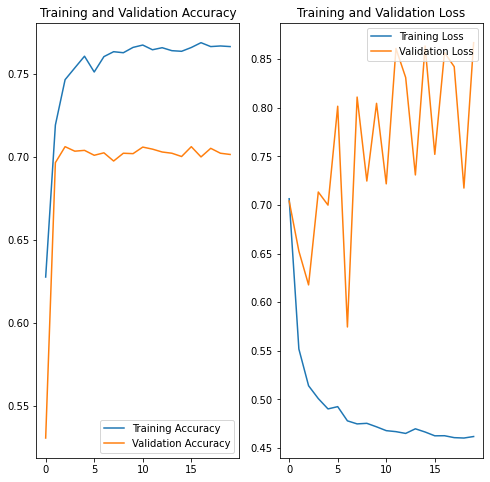

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.predict(["This is a regular sentence"])

ValueError: ignored